<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/Conceitos-TV-P2/blob/main/DSP%20/01_Introdu%C3%A7%C3%A3o/05_Coeficiente_de_Correla%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

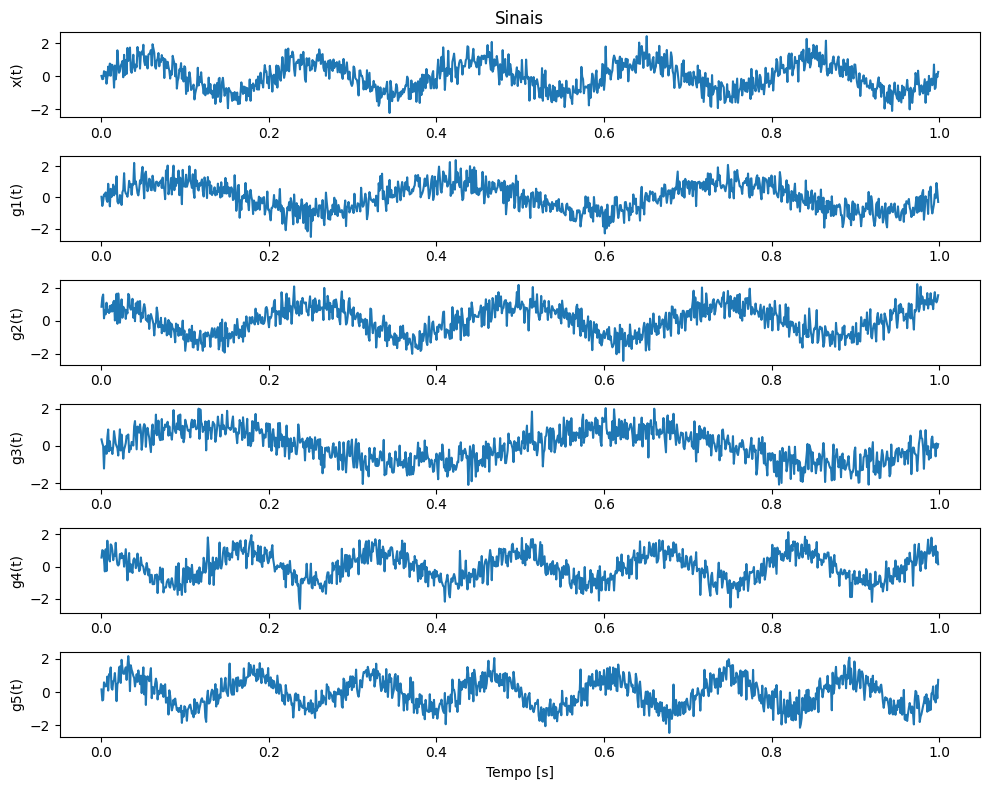

Coeficientes de correlação:
x(t) vs g1(t): 0.013329662427333978
x(t) vs g2(t): 0.009320381663008836
x(t) vs g3(t): -0.022886834114777488
x(t) vs g4(t): 0.03171829308770488
x(t) vs g5(t): 0.016822573447560826


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Parâmetros dos sinais
Fs = 1000       # Taxa de amostragem
T = 1 / Fs      # Período de amostragem
t = np.arange(0, 1, T)    # Vetor de tempo

# Sinal x(t)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))

# Sinais g1(t) a g5(t)
g1 = np.sin(2 * np.pi * 3 * t) + 0.5 * np.random.randn(len(t))
g2 = np.cos(2 * np.pi * 4 * t) + 0.5 * np.random.randn(len(t))
g3 = np.sin(2 * np.pi * 2 * t) + 0.5 * np.random.randn(len(t))
g4 = np.cos(2 * np.pi * 6 * t) + 0.5 * np.random.randn(len(t))
g5 = np.sin(2 * np.pi * 7 * t) + 0.5 * np.random.randn(len(t))

# Cálculo dos coeficientes de correlação
corr_x_g1, _ = pearsonr(x, g1)
corr_x_g2, _ = pearsonr(x, g2)
corr_x_g3, _ = pearsonr(x, g3)
corr_x_g4, _ = pearsonr(x, g4)
corr_x_g5, _ = pearsonr(x, g5)

# Plot dos sinais
plt.figure(figsize=(10, 8))

plt.subplot(6, 1, 1)
plt.plot(t, x)
plt.title('Sinais')
plt.ylabel('x(t)')

plt.subplot(6, 1, 2)
plt.plot(t, g1)
plt.ylabel('g1(t)')

plt.subplot(6, 1, 3)
plt.plot(t, g2)
plt.ylabel('g2(t)')

plt.subplot(6, 1, 4)
plt.plot(t, g3)
plt.ylabel('g3(t)')

plt.subplot(6, 1, 5)
plt.plot(t, g4)
plt.ylabel('g4(t)')

plt.subplot(6, 1, 6)
plt.plot(t, g5)
plt.xlabel('Tempo [s]')
plt.ylabel('g5(t)')

# Exibir os gráficos
plt.tight_layout()
plt.show()

# Imprimir os coeficientes de correlação
print('Coeficientes de correlação:')
print('x(t) vs g1(t):', corr_x_g1)
print('x(t) vs g2(t):', corr_x_g2)
print('x(t) vs g3(t):', corr_x_g3)
print('x(t) vs g4(t):', corr_x_g4)
print('x(t) vs g5(t):', corr_x_g5)


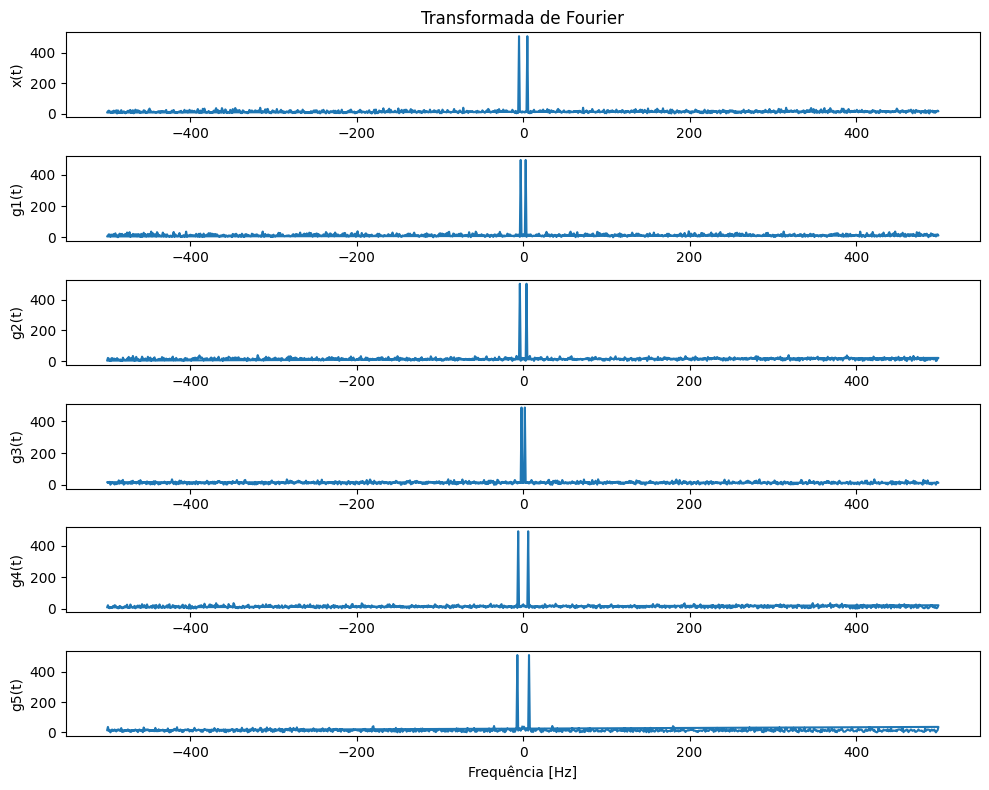

In [2]:
# Cálculo da FFT
X = np.fft.fft(x)
G1 = np.fft.fft(g1)
G2 = np.fft.fft(g2)
G3 = np.fft.fft(g3)
G4 = np.fft.fft(g4)
G5 = np.fft.fft(g5)

# Frequências
freq = np.fft.fftfreq(len(t), T)

# Plot das FFTs
plt.figure(figsize=(10, 8))

plt.subplot(6, 1, 1)
plt.plot(freq, np.abs(X))
plt.title('Transformada de Fourier')
plt.ylabel('x(t)')

plt.subplot(6, 1, 2)
plt.plot(freq, np.abs(G1))
plt.ylabel('g1(t)')

plt.subplot(6, 1, 3)
plt.plot(freq, np.abs(G2))
plt.ylabel('g2(t)')

plt.subplot(6, 1, 4)
plt.plot(freq, np.abs(G3))
plt.ylabel('g3(t)')

plt.subplot(6, 1, 5)
plt.plot(freq, np.abs(G4))
plt.ylabel('g4(t)')

plt.subplot(6, 1, 6)
plt.plot(freq, np.abs(G5))
plt.xlabel('Frequência [Hz]')
plt.ylabel('g5(t)')

# Exibir os gráficos
plt.tight_layout()
plt.show()

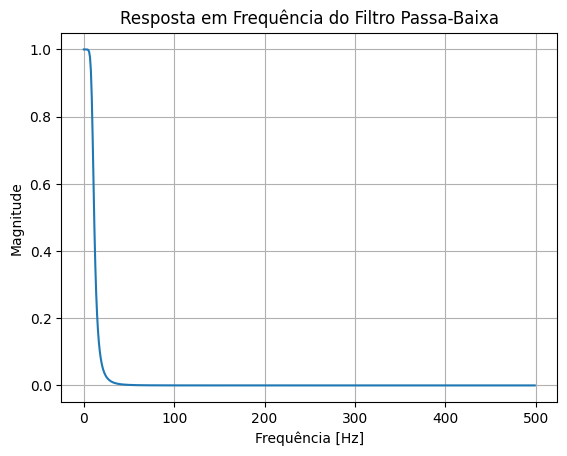

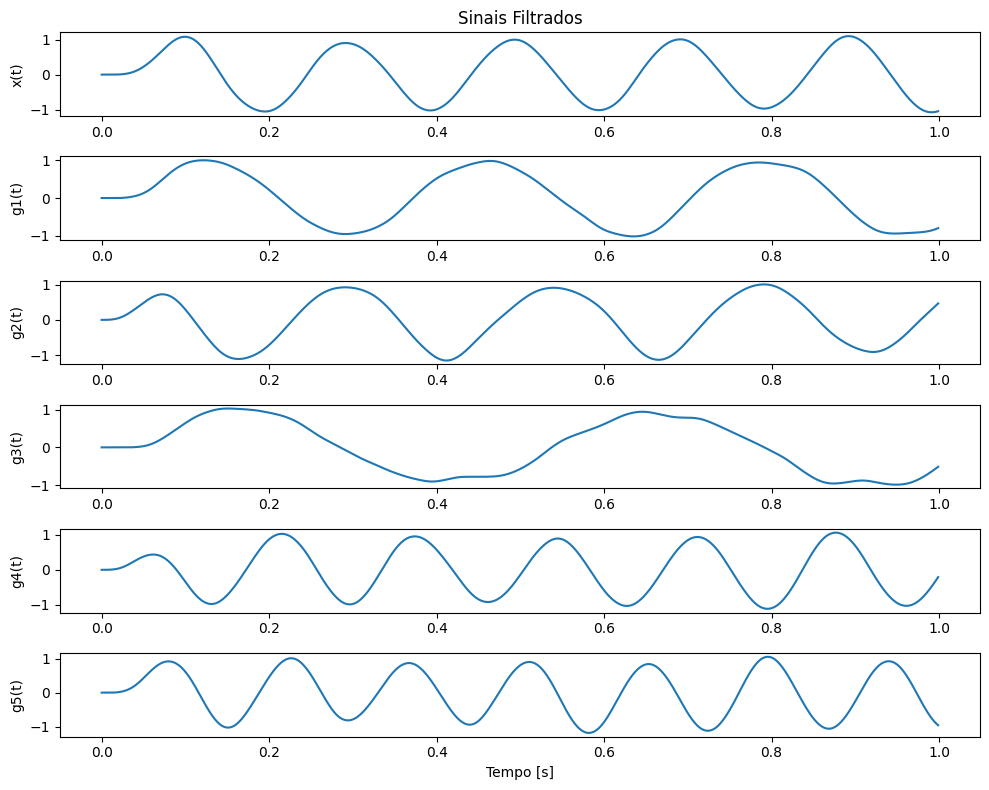

In [4]:
from scipy.signal import freqz
from scipy import signal

# Filtro passa-baixa
cutoff_freq = 10  # Frequência de corte do filtro
normalized_cutoff_freq = cutoff_freq / (Fs / 2)
b, a = signal.butter(4, normalized_cutoff_freq, btype='low', analog=False)

# Aplicar filtro passa-baixa aos sinais
x_filtered = signal.lfilter(b, a, x)
g1_filtered = signal.lfilter(b, a, g1)
g2_filtered = signal.lfilter(b, a, g2)
g3_filtered = signal.lfilter(b, a, g3)
g4_filtered = signal.lfilter(b, a, g4)
g5_filtered = signal.lfilter(b, a, g5)

# Calcular resposta em frequência do filtro
w, h = freqz(b, a, fs=Fs)

# Plot da resposta em frequência do filtro
plt.figure()
plt.plot(w, np.abs(h))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.title('Resposta em Frequência do Filtro Passa-Baixa')
plt.grid(True)

# Plot dos sinais filtrados
plt.figure(figsize=(10, 8))

plt.subplot(6, 1, 1)
plt.plot(t, x_filtered)
plt.title('Sinais Filtrados')
plt.ylabel('x(t)')

plt.subplot(6, 1, 2)
plt.plot(t, g1_filtered)
plt.ylabel('g1(t)')

plt.subplot(6, 1, 3)
plt.plot(t, g2_filtered)
plt.ylabel('g2(t)')

plt.subplot(6, 1, 4)
plt.plot(t, g3_filtered)
plt.ylabel('g3(t)')

plt.subplot(6, 1, 5)
plt.plot(t, g4_filtered)
plt.ylabel('g4(t)')

plt.subplot(6, 1, 6)
plt.plot(t, g5_filtered)
plt.xlabel('Tempo [s]')
plt.ylabel('g5(t)')

# Exibir os gráficos
plt.tight_layout()
plt.show()